In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from vosk import Model
from folderFunctions import *


# tools work in progress
import tools

reload(tools)
from tools import *

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

In [2]:
# andreas_path = "Inspelning (3).wav"
andreas_path = "example_speech_Andreas/180923214834-Y20UOTIE-text-000.wav"
Fs, x = wavfile.read(andreas_path)
x = x[:, 0]
x = x / x.std()
print(len(x) / Fs, "sekunder")

digital_path = "wav_examples/digitala_resurser_sv.wav"
Fs_2, x_2 = wavfile.read(digital_path)
x_2 = x_2 / x_2.std()

45.09315192743764 sekunder


In [3]:
# pre-process andreas to mono
path_output = "audio_preproc/"
_ = preprocess(andreas_path, path_output)

preprocessing 180923214834-Y20UOTIE-text-000


In [4]:
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"
model = Model(model_path)
vowels_sv = ["a", "e", "i", "o", "u", "y", "å", "ä", "ö"]
language = "Swedish"
createLanguageFolder(language, vowels_sv)

In [5]:
mono_andreas_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"
words_andreas = rec_vosk(mono_andreas_path, model)
Fs, audio = wavfile.read(mono_andreas_path)
segments, vowels_segment = segment_by_words(words_andreas, audio, Fs, vowels_sv)
extractVowels(segments, vowels_segment, Fs, language, "180923214834-Y20UOTIE-text-000")

0 i ------------------- from 0.30 to 0.42 sec, confidence: 100.00%
1 skymningen ---------- from 0.42 to 1.26 sec, confidence: 100.00%
2 en ------------------ from 1.35 to 1.50 sec, confidence: 100.00%
3 mycket -------------- from 1.50 to 1.80 sec, confidence: 100.00%
4 het ----------------- from 1.83 to 2.10 sec, confidence: 100.00%
5 dag ----------------- from 2.10 to 2.43 sec, confidence: 100.00%
6 i ------------------- from 2.43 to 2.52 sec, confidence: 100.00%
7 början -------------- from 2.52 to 2.79 sec, confidence: 100.00%
8 av ------------------ from 2.79 to 2.91 sec, confidence: 100.00%
9 juli ---------------- from 2.91 to 3.36 sec, confidence: 100.00%
10 lämnade ------------- from 3.36 to 3.99 sec, confidence: 100.00%
11 en ------------------ from 3.99 to 4.14 sec, confidence: 100.00%
12 ung ----------------- from 4.14 to 4.41 sec, confidence: 100.00%
13 man ----------------- from 4.41 to 4.68 sec, confidence: 100.00%
14 sin ----------------- from 4.68 to 4.92 sec, confidence

c:\Users\marcu\anaconda3\envs\timeseries\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w


25.66336321002875
1.2935772870075084
3.544609176727306
1.3034513751410302
3.3456340270699734
1.2718319659259691
0.6472835429884505
2.8792153697028073
0.981973606544436
2.357002432335945
0.5681124460690512
2.197918177931972
0.9837782310215109
4.109708851781862
0.689402779166487
2.7780355362467883
1.77677466640238
7.840150518678927
1.0791865392579272
4.010215279233414
1.270397088719141
3.608848432839423
1.1194643544870502
2.802933385590485
5.510721797941226
0.7955709137333127
0.7007050302925588
0.7835505263483968
0.6130112905816683
3.598336721648934
1.1335412349177147
0.5715953731471473
1.6494644621977708
1.4138390170908597
1.8576717888948249
1.3032438575570549
6.717297646453821
1.2302315765870677
2.22654169186052
2.949578337265393
6.48671217640718
7.826521218254413
0.6479575930223298
5.832079681444584
1.9396418423939892
1.1588114135197314
1.9044262011456468
3.3134662955900254
0.561379087706169
4.415820518527944
2.4448658687203277
0.5649684195072204
1.2335434941697159
0.6411445958343336


2.1979181779319727
0.7857749468463782


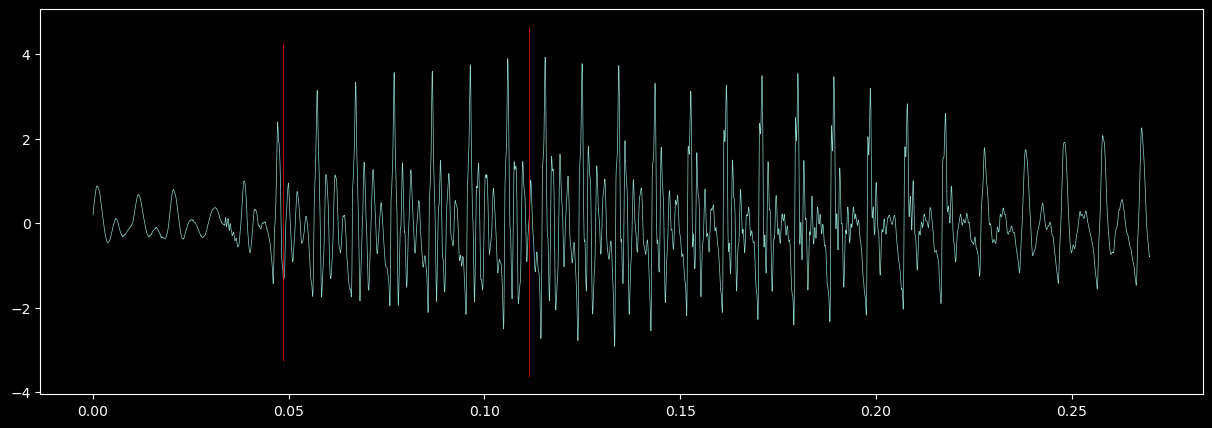

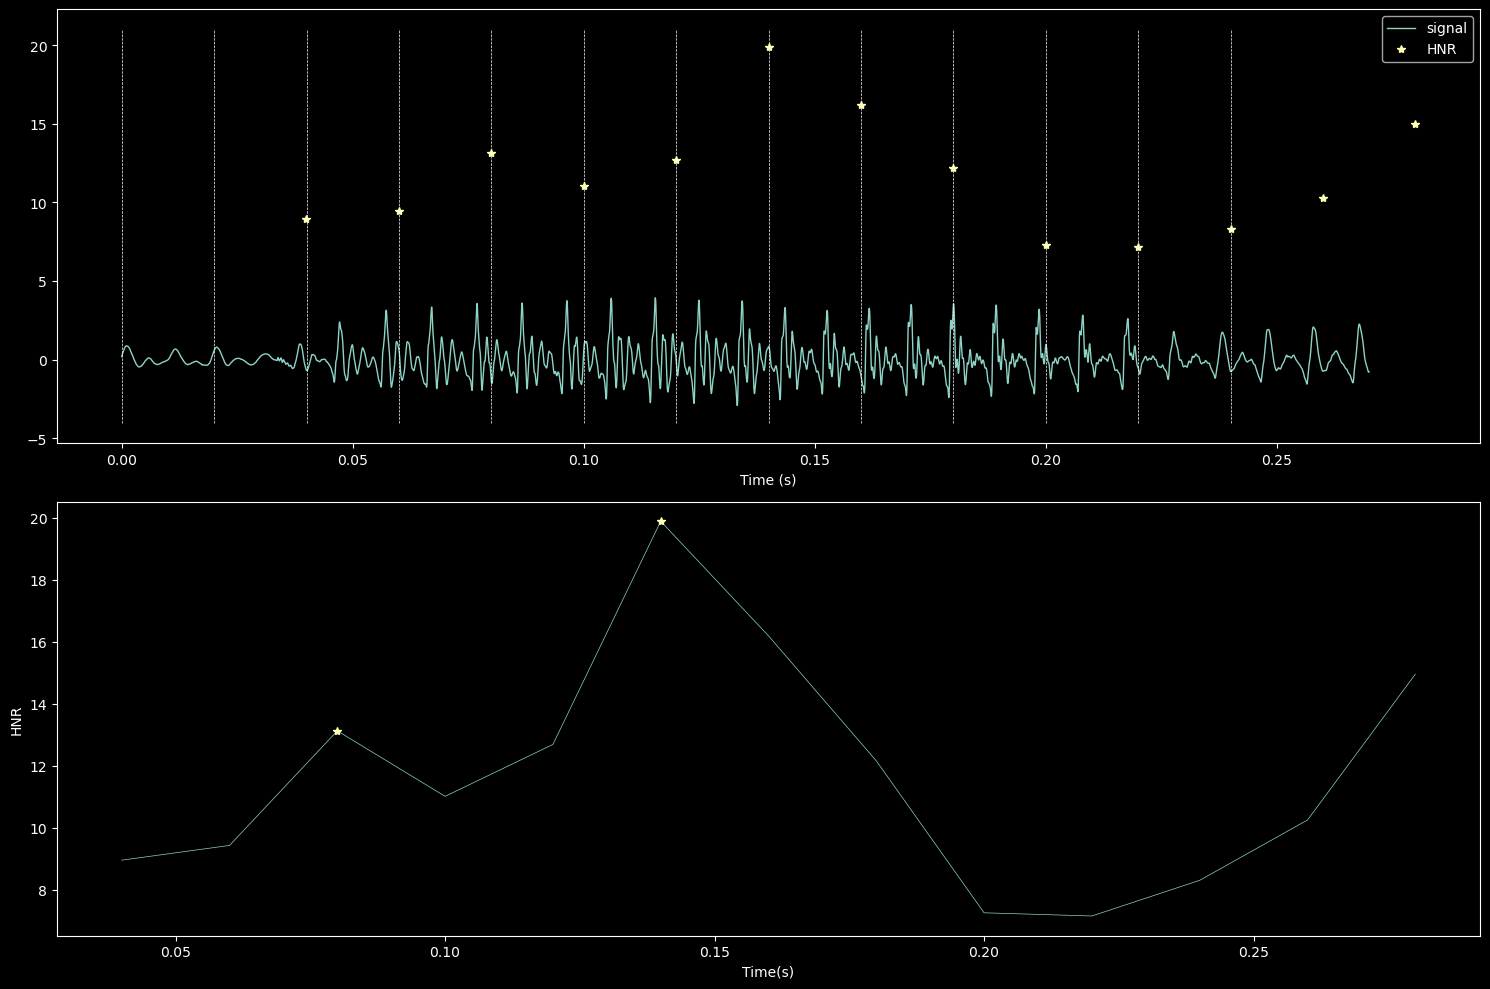

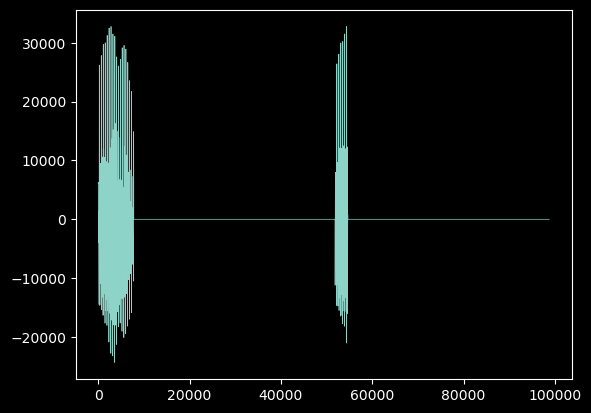

In [6]:
reload(tools)
from tools import *

k = 7
x = segments[k] / segments[k].std()
_, _, _, peak_sounds = HNR_peaks(x, Fs, n_peaks=3, plotit=True)

stitched = stitch_frames(peak_sounds, padding=1 * Fs)
wavfile.write(f"output/vowels{k}.wav", Fs, stitched)

plt.figure()
plt.plot(stitched)

In [7]:
wavfile.write(f"output/word{k}.wav", Fs, wavScaler(x))

In [8]:
import speech_recognition as sr

rec_vosk(f"output/vowels{k}.wav", model)


def speechToText(path):
    r = sr.Recognizer()
    with sr.AudioFile(path) as source:
        audio_text = r.listen(source, timeout=3)
        try:
            text = r.recognize_google(audio_text, language="sv-SE")
            print(text)
        except:  # noqa: E722
            print("trouble in paradise")


speechToText(f"output/word{k}.wav")

0 det ----------------- from 1.11 to 1.29 sec, confidence: 50.78%
trouble in paradise
